## IMPORT LIBS

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})

#### IMPORT DATASETS

In [43]:
train = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/train.csv")
test = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/test.csv")
#gender = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/gender_submission.csv")

## DATA EXPLORATION

### DATA PREPARATION

In [44]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [45]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(train.corr(), fignum=f.number)
# plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
# plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=18)
# plt.title('Correlation Matrix', fontsize=16)

#### VARIABLES INFORMATIONS

In [46]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

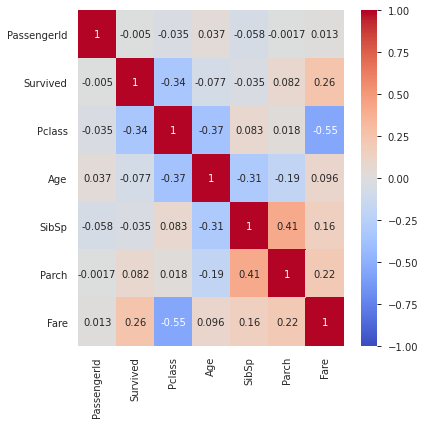

In [47]:
fig, ax = plt.subplots(figsize=(6,6))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()

## DATA CLEANING

In [48]:
# train = pd.read_csv("train.csv")

def cleaning(data):
    # Colonnes sans intérêt
    data = data.drop(["PassengerId", "Name", 'SibSp', 'Parch', "Cabin", "Ticket"], axis=1)
    # Création de la colonne Female (0,1) pour remplacer 'Sex'
    data['Female']=list(map(lambda x: int(x=='female'), data['Sex']))
    data = data.drop(["Sex"], axis=1)
    # Colonnes ayant des Nan et suppression des lignes correspondantes
    print('Les colonnes concernées sont:',data.columns[data.isna().any()].tolist()) 
    data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    # embarked transcrite sur le code touche clavier
    data['Embarked'] = [ord(i) for i in data['Embarked']] # compris entre 65 et 90
         # chr(code) pour retranscription
    return data
c_train = cleaning(train)
c_test = cleaning(test)
c_train

Les colonnes concernées sont: ['Age', 'Embarked']
Les colonnes concernées sont: ['Age', 'Fare']


Survived  Pclass   Age     Fare  Embarked  Female
0           0       3  22.0   7.2500        83       0
1           1       1  38.0  71.2833        67       1
2           1       3  26.0   7.9250        83       1
3           1       1  35.0  53.1000        83       1
4           0       3  35.0   8.0500        83       0
..        ...     ...   ...      ...       ...     ...
885         0       3  39.0  29.1250        81       1
886         0       2  27.0  13.0000        83       0
887         1       1  19.0  30.0000        83       1
889         1       1  26.0  30.0000        67       0
890         0       3  32.0   7.7500        81       0

[712 rows x 6 columns]

In [49]:
c_train.describe()

Survived      Pclass         Age        Fare    Embarked      Female
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093   34.567251   80.000000    0.363764
std      0.491139    0.836854   14.492933   52.938648    6.160534    0.481420
min      0.000000    1.000000    0.420000    0.000000   67.000000    0.000000
25%      0.000000    1.000000   20.000000    8.050000   83.000000    0.000000
50%      0.000000    2.000000   28.000000   15.645850   83.000000    0.000000
75%      1.000000    3.000000   38.000000   33.000000   83.000000    1.000000
max      1.000000    3.000000   80.000000  512.329200   83.000000    1.000000

# DATA EXPLORATION

#### Pour chacune des variables suivantes, créer un ou plusieurs diagrammes qui la résume au mieux.

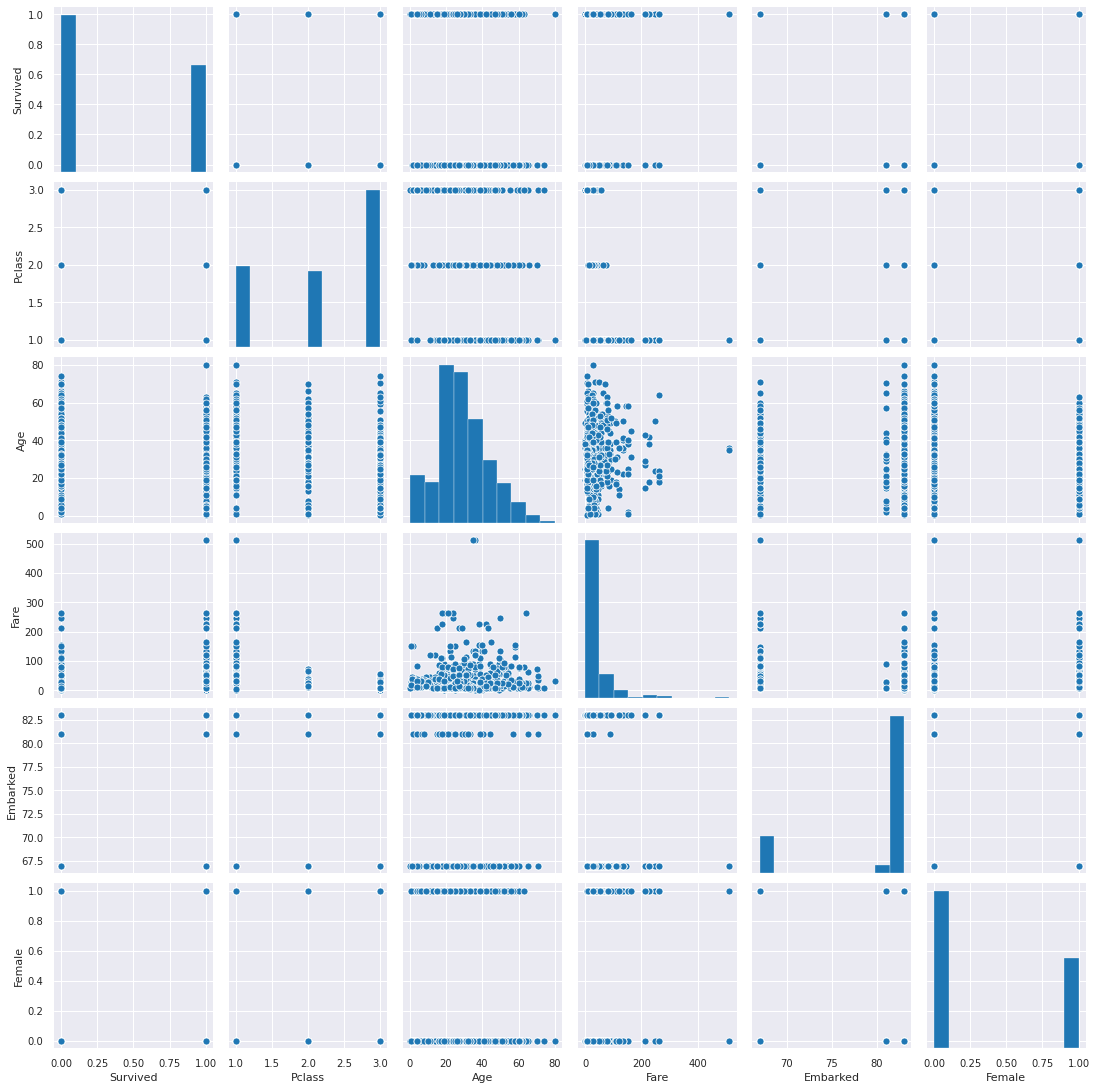

In [50]:
# Etude des liens entre deux colonnes et la répartion des valeurs dans une colonne
sns.pairplot(c_train, palette="husl")

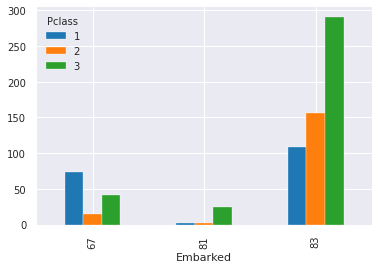

In [51]:
'''
Pour le(s)'entrée(s) C, les personnes le la première classe sont les plus concernées
La troisième classe se situe sur toutes les entrées, majoritaire sur les entrées S et omniprésente sur les entrées Q.
'''
# Répartion des différentes classes par entrées. CAHNGER NOMS ABSCISSES
pd.crosstab(c_train['Embarked'], c_train['Pclass']) .plot.bar()
#c_train = c_train.drop('Embarked',axis=1)

'\nLes tarifs du voyage sont majoritairements tournés entre 0 et 100.\n(50% ont un coût situé entre 8 et 33, cf c_train.describe())\n'

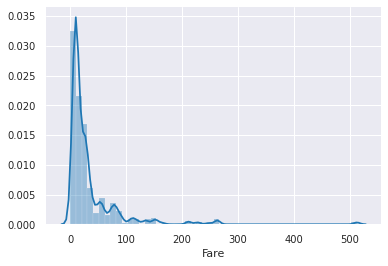

In [52]:
# Les tarifs du voyage (nombre de persones par tarifs non pris en compte)
sns.distplot(c_train['Fare'])
'''
Les tarifs du voyage sont majoritairements tournés entre 0 et 100.
(50% ont un coût situé entre 8 et 33, cf c_train.describe())
'''

'\nLa majorité des femmes ont entre 15 et 40 ans.\nIl est etonnant que les femmes ayant moins de 10 ans soient sur un tarif plus élévé que la moyenne des tarifs pour les femmes agées entre 15 et 45 ans\n'

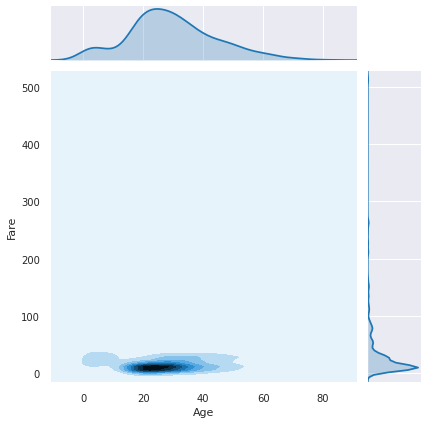

In [53]:
# répartions entre les tarifs et les âges
sns.jointplot('Age','Fare', data=c_train, kind='kde')
'''
La majorité des femmes ont entre 15 et 40 ans.
Il est etonnant que les femmes ayant moins de 10 ans soient sur un tarif plus élévé que la moyenne des tarifs pour les femmes agées entre 15 et 45 ans
'''

In [55]:
# Répartion des personnes par classes et age (representation 1/2)
# sns.carplot(x='Pclass',y='Age', data=c_train, hue='Female')

"\nOn constate que plus l'age est important, plus grandes sont les chances d'être dans une classe supérieure.\nUn homme a trés lègèrement plus de chances de se situé sur une classe supérieure qu'une femme.\n"

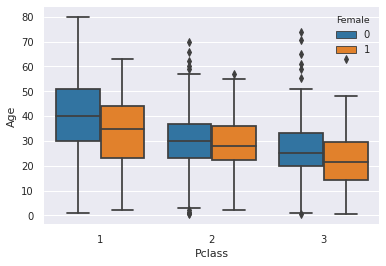

In [56]:
# Répartion des personnes par classes et age (representation 2/2)
sns.boxplot(x='Pclass',y='Age', data=c_train, hue='Female')
"""
On constate que plus l'age est important, plus grandes sont les chances d'être dans une classe supérieure.
Un homme a trés lègèrement plus de chances de se situé sur une classe supérieure qu'une femme.
"""

/home/fakhredine/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/fakhredine/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


"\nOn contate qu'il y a plus de personnes autour de 20-35 ans dans le Titanic. Ce qui est parfaitement valide.\nCependant, on trouve moins d'enfants autour de 10 ans que d'enfants issus de la naissance.\n"

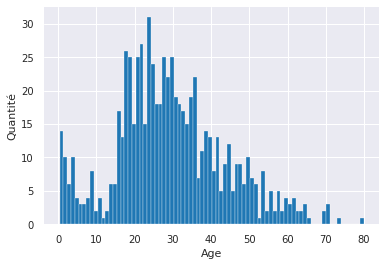

In [57]:
# Nombre de personnes par age
plt.xlabel('Age')
plt.ylabel('Quantité')
rien = plt.hist(train['Age'].ravel(), bins=80) 
'''
On contate qu'il y a plus de personnes autour de 20-35 ans dans le Titanic. Ce qui est parfaitement valide.
Cependant, on trouve moins d'enfants autour de 10 ans que d'enfants issus de la naissance.
'''

"\nOn retrouve des constatations similaires à d'autres représentation montrants des liens entre la colonne Age et la colonne Pclass, \nelle-même en lien avec la colonne Fare.\n"

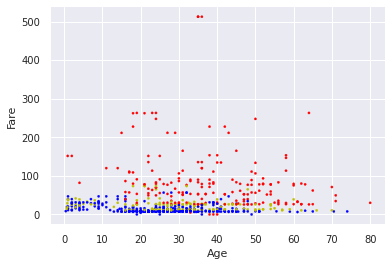

In [58]:
# Répartition des classes suivant le coût des tickets et l'âge des personnes
f = lambda z: int(z==1)*'r' + int(z==2)*'y' + int(z==3)*'b'
X, Y, Z = train['Age'], train['Fare'], train['Pclass']
plt.scatter(X, Y, alpha=1, s=5, facecolor=list(map(f,Z)))
plt.xlabel('Age')
plt.ylabel('Fare')
'''
On retrouve des constatations similaires à d'autres représentation montrants des liens entre la colonne Age et la colonne Pclass, 
elle-même en lien avec la colonne Fare.
'''

/home/fakhredine/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


'\nLes lignes correspondent aux classes et les colonnes à la survie. Majoritairement, \nles personnes de la classe 3 sont décédées Pour la première classe, ils ont eus de la chance\n'

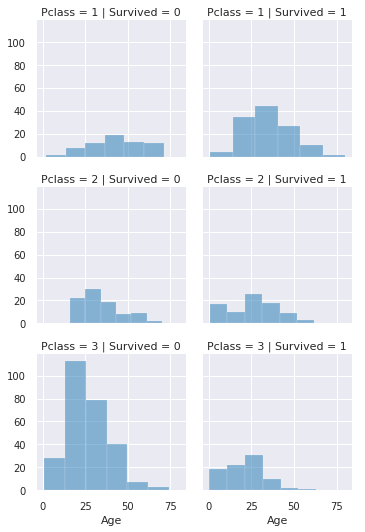

In [59]:
grid = sns.FacetGrid(c_train, col='Survived', row='Pclass', size=2.5, aspect=1)
grid.map(plt.hist, 'Age', alpha=.5, bins=c_train.shape[1])
grid.add_legend()
'''
Les lignes correspondent aux classes et les colonnes à la survie. Majoritairement, 
les personnes de la classe 3 sont décédées Pour la première classe, ils ont eus de la chance
'''

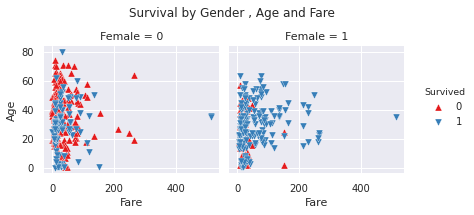

In [60]:
g = sns.FacetGrid(c_train, hue="Survived", col="Female", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

Il y a moins de survivants que de morts.
En admettant qu'il y a autant de femmes que d'hommes sur le bateau, les femmes ont plus de chances de survivre

In [61]:
# Nombre de suivivants ou non au naufrage
print("Survived :" ,len(train[train['Survived'] == 1]))
print("Not Survived :",len(train[train['Survived'] == 0]))
'''
Sur les données étudiées, on relève 342 survivants et 549 morts
'''

Survived : 342
Not Survived : 549


'\nSur les données étudiées, on relève 342 survivants et 549 morts\n'

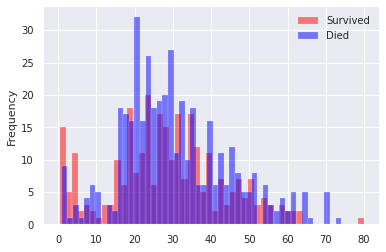

In [62]:
# Répartion des personnes mortes ou survécues suivant leurs âges.
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

"\nIl n'y a de vue aucun lien entre le sexe et Pclass.\nLes femmes ont plus de chances qu'un homme de survivre face au défi conséquent de la situation étudiée.\nLes hommes ont autour de 4 ans de plus en moyenne que les femmes.\n"

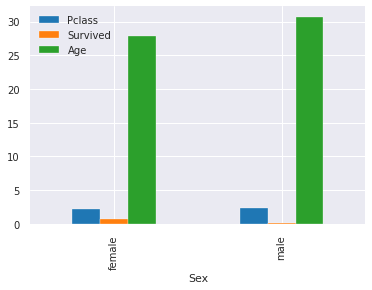

In [63]:
# Catégories associées aux âges
train[['Sex','Pclass','Survived','Age']].groupby(['Sex']).mean().plot.bar()
'''
Il n'y a de vue aucun lien entre le sexe et Pclass.
Les femmes ont plus de chances qu'un homme de survivre face au défi conséquent de la situation étudiée.
Les hommes ont autour de 4 ans de plus en moyenne que les femmes.
'''

'\nDes liens déjà rencontrés existent entre la classe et, Survived ou Age\n'

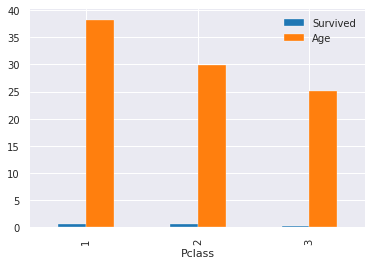

In [64]:
# Caractéristiques des personnes dans les différentes classes
train[['Sex','Pclass','Survived','Age']].groupby(['Pclass']).mean().plot.bar()
'''
Des liens déjà rencontrés existent entre la classe et, Survived ou Age
'''

On constate que le nombre de survivants est plus élévé dans les classes supérieures.
Pour les deux sexes, les personnes les plus agées ont les meilleures classes.

In [65]:
# Positionnement des enfants dans les différentes classes
print(train[train['Age']<18]['Pclass'].value_counts()/len(train[train['Age']<18]))
'''
70% des enfants sont situés dans la troisième classe, pourquoi leur payer la première classe? Ce n'est pas eux qui payent!
'''

3    0.690265
2    0.203540
1    0.106195
Name: Pclass, dtype: float64


"\n70% des enfants sont situés dans la troisième classe, pourquoi leur payer la première classe? Ce n'est pas eux qui payent!\n"

# STATICTIC TEST

Test d’hypothèse pour savoir si oui ou non, les enfants ont été privilégiés lors du naufrage.

In [67]:
import scipy.stats as stats

def fisherstats():
    return stats.fisher_exact([[train["Pclass"][0], train["Sex"][0]], [train["Pclass"][0], train['Age'][0]]])
    
# oddsratio, pvalue = fisherstats()

In [69]:
# print(pvalue)

Test d’hypothèse pour vérifier si oui ou non, les femmes ont été privilégiées lors du naufrage.

# CREATING MODEL

In [79]:
# Création des dataFrames utiles pour prédire Survived
X_train = c_train.drop('Survived',axis=1)
y_train = c_train['Survived']
X_test = c_test

In [80]:
# Entrainnement du modèle de regression logistique 
from sklearn.linear_model import LogisticRegression # OU LinearRegression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# Etude des différences entre y_train et y_pred_prob
y_pred_prob = logreg.predict_proba(X_train)
print('y_train:\n', y_train.values[:10])
print('y_pred_prob[:,1] :\n',y_pred_prob[:,1].T[:10])

y_train:
 [0 1 1 1 0 0 0 1 1 1]
y_pred_prob[:,1] :
 [0.10782599 0.92899505 0.53559257 0.89966026 0.07079442 0.29346061
 0.19729646 0.52675445 0.90361342 0.71574646]


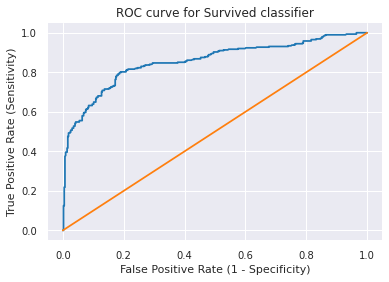

In [74]:
# ROC curve associée à notre représentation
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob[:,1])
plt.plot(fpr, tpr, [0,1],[0,1])
plt.xlim([-0.05, 1.05]); plt.ylim([-0.05, 1.05])
plt.title('ROC curve for Survived classifier')
plt.xlabel('False Positive Rate (1 - Specificity)'); plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [75]:
# AUC score
print(metrics.roc_auc_score(y_train, y_pred_prob[:,1]))
# Use score method to get accuracy of model ()
print(logreg.score(X_train, y_train))

0.8538841391509435
0.7949438202247191


In [76]:
# Etude de la valeur soeuil à prendre
import ipywidgets as widgets
from sklearn.preprocessing import binarize
def tests(x):    
    # predistions suivant la valeur soeuil prise
    y_pred_class = binarize([y_pred_prob[:,1]], x).T
    # print the first 25 true and predicted responses
    print('True:', y_train.values.T[:10])
    print('Pred:', y_pred_class.T[0,:10])
    # confusion matrix
    conf_matrix = metrics.confusion_matrix(y_train, y_pred_class)
    print(conf_matrix)
    # calculate accuracy
    print(metrics.accuracy_score(y_train, y_pred_class))
    print(metrics.roc_auc_score(y_train, y_pred_prob[:,1]))
    
widgets.interact(tests, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))

True: [0 1 1 1 0 0 0 1 1 1]
Pred: [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[[359  65]
 [ 81 207]]
0.7949438202247191
0.8538841391509435


<function __main__.tests(x)>

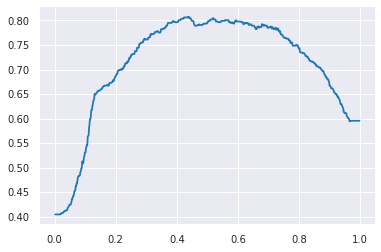

Les meilleures valeurs à prendre pour le soeuil sont dans [0.43679775280898875, 0.4396067415730337]


In [77]:
# Etude de la meilleur valeur soeuil à prendre
def f(x):
    # predict diabetes if the predicted probability is greater than x
    y_pred_class = binarize([y_pred_prob[:,1]], x).T
    # calculate accuracy 
    return metrics.accuracy_score(y_train, y_pred_class) 

x = [i/len(y_pred_prob[:,1]) for i in range(1,len(y_pred_prob[:,1]))]
y = [f(i) for i in x]
plt.plot(x, y)
plt.show()
plt.close()

points = dict(zip(x, y))
val_soeuil = {x  for x, y in points.items() if y == max(points.values())}
print(f"Les meilleures valeurs à prendre pour le soeuil sont dans [{min(val_soeuil)}, {max(val_soeuil)}]")

In [81]:
#FAKHREDINE

In [84]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = logreg.predict(X_test)

THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

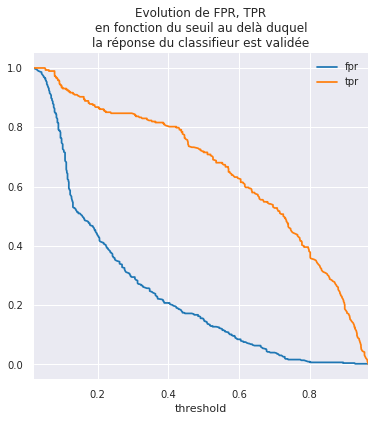

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = logreg.predict_proba(X_train)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_train, proba, pos_label=logreg.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = logreg.predict_proba(X_train)[:, 0]
fpr0, tpr0, thresholds0 = roc_curve(y_train, proba, pos_label=logreg.classes_[0], drop_intermediate=False)
thresholds0.shape

(660,)

0.8538841391509434


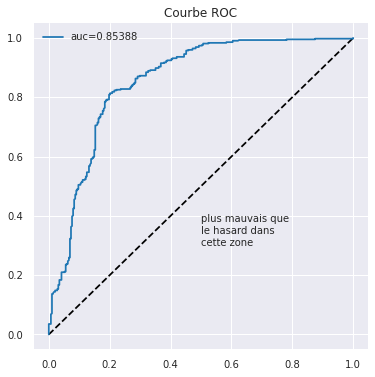

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
print(aucf)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

In [99]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_train, logreg.predict(X_train)), columns=['Survived', 'Not Survived'])
cm.index = ['Survived', 'Not Survived']
cm

Survived  Not Survived
Survived           359            65
Not Survived        81           207

In [101]:
# # csvOutPut = valid_test['resilies'] + valid_test['predicted'] + valid_test['correct']
# csvOutPut = c_test

# csvOutPut['Survived'] = gender['Survived']

# # csvOutPut['correct'] = valid_test['correct']
# csvOutPut['prediction'] = pd.DataFrame(model.predict(X_test))

# # csvOutPut[csvOutPut['prediction'] == 1]
# # csvOutPut[csvOutPut['Survived'] == 1]

# csvOutPut
# # csvOutPut.to_csv("/home/fakhredine/Desktop/prediction.csv", index=False)

# PREDICTION ON TEST FILE